Epoch 1/10:   0%|          | 0/727 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
Epoch 1/10: 100%|██████████| 727/727 [14:43<00:00,  1.22s/batch]


Epoch 1/10, Loss: 1.4821, Train Accuracy: 0.4236


Validation: 100%|██████████| 182/182 [03:23<00:00,  1.12s/batch]


Validation Loss: 1.2891, Validation Accuracy: 0.4920


Epoch 2/10: 100%|██████████| 727/727 [15:07<00:00,  1.25s/batch]


Epoch 2/10, Loss: 1.1354, Train Accuracy: 0.5661


Validation: 100%|██████████| 182/182 [03:50<00:00,  1.27s/batch]


Validation Loss: 1.1963, Validation Accuracy: 0.5509


Epoch 3/10: 100%|██████████| 727/727 [14:38<00:00,  1.21s/batch]


Epoch 3/10, Loss: 0.8627, Train Accuracy: 0.6813


Validation: 100%|██████████| 182/182 [03:41<00:00,  1.22s/batch]


Validation Loss: 1.2576, Validation Accuracy: 0.5516


Epoch 4/10: 100%|██████████| 727/727 [14:25<00:00,  1.19s/batch]


Epoch 4/10, Loss: 0.4420, Train Accuracy: 0.8450


Validation: 100%|██████████| 182/182 [03:47<00:00,  1.25s/batch]


Validation Loss: 1.6683, Validation Accuracy: 0.5319


Epoch 5/10: 100%|██████████| 727/727 [14:35<00:00,  1.20s/batch]


Epoch 5/10, Loss: 0.1423, Train Accuracy: 0.9606


Validation: 100%|██████████| 182/182 [03:48<00:00,  1.25s/batch]


Validation Loss: 2.2330, Validation Accuracy: 0.5156


Epoch 6/10: 100%|██████████| 727/727 [14:08<00:00,  1.17s/batch]


Epoch 6/10, Loss: 0.0732, Train Accuracy: 0.9847


Validation: 100%|██████████| 182/182 [02:56<00:00,  1.03batch/s]


Validation Loss: 2.5415, Validation Accuracy: 0.5111


Epoch 7/10: 100%|██████████| 727/727 [13:28<00:00,  1.11s/batch]


Epoch 7/10, Loss: 0.0567, Train Accuracy: 0.9902


Validation: 100%|██████████| 182/182 [03:21<00:00,  1.11s/batch]


Validation Loss: 2.6523, Validation Accuracy: 0.5211


Epoch 8/10: 100%|██████████| 727/727 [12:51<00:00,  1.06s/batch]


Epoch 8/10, Loss: 0.0521, Train Accuracy: 0.9892


Validation: 100%|██████████| 182/182 [03:28<00:00,  1.15s/batch]


Validation Loss: 2.9760, Validation Accuracy: 0.5145


Epoch 9/10: 100%|██████████| 727/727 [13:19<00:00,  1.10s/batch]


Epoch 9/10, Loss: 0.0539, Train Accuracy: 0.9877


Validation: 100%|██████████| 182/182 [03:09<00:00,  1.04s/batch]


Validation Loss: 3.0387, Validation Accuracy: 0.5006


Epoch 10/10: 100%|██████████| 727/727 [12:48<00:00,  1.06s/batch]


Epoch 10/10, Loss: 0.0528, Train Accuracy: 0.9879


Validation: 100%|██████████| 182/182 [03:21<00:00,  1.10s/batch]


Validation Loss: 2.9533, Validation Accuracy: 0.5130
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.38      0.33      0.35       631
    contempt       0.36      0.45      0.40       591
     disgust       0.31      0.26      0.28       501
        fear       0.41      0.32      0.36       651
       happy       0.84      0.80      0.82      1023
     neutral       0.76      0.78      0.77      1038
         sad       0.33      0.31      0.32       621
    surprise       0.35      0.47      0.40       753

    accuracy                           0.51      5809
   macro avg       0.47      0.46      0.46      5809
weighted avg       0.52      0.51      0.51      5809



<Figure size 1000x1000 with 0 Axes>

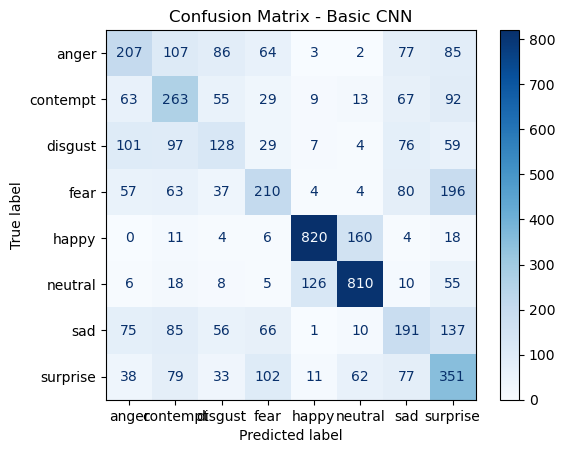

<Figure size 1000x1000 with 0 Axes>

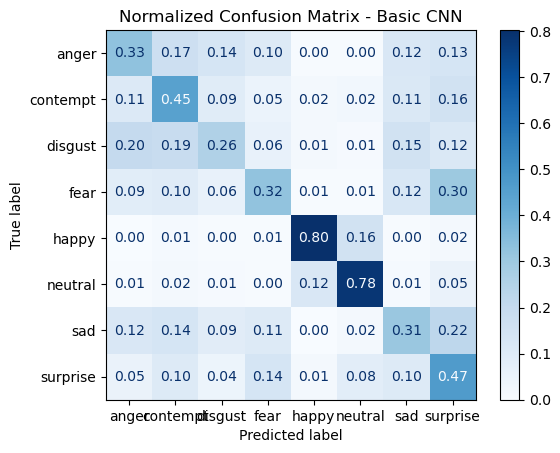

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# To Load Custom loadAffectNetdata class
class loadAffectNetdata(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and d.name != ".ipynb_checkpoints"]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

# Initial Transformations
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Loading the dataset
base_dir = 'affectnet/'
dataset = loadAffectNetdata(root=base_dir, transform=base_transform)

# Splitting the dataset in 80-20 ratio
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Defining a Basic CNN Architecture
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 8)

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(kernel_size=2, stride=2)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(kernel_size=2, stride=2)(x)
        x = x.view(x.size(0), -1)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiating, training the BasicCNN model
model = BasicCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 10
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    
    # Evaluating on the Validation set
    model.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Save the model
torch.save(model.state_dict(), 'basic_cnn_affectnet.pth')

# Evaluating the model
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Classification Report
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print("Classification Report for Validation Set:")
print(report)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=dataset.classes)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 10))
cmd.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Basic CNN')
plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd_normalized = ConfusionMatrixDisplay(cm_normalized, display_labels=dataset.classes)

# Plotting Normalized Confusion Matrix
plt.figure(figsize=(10, 10))
cmd_normalized.plot(cmap='Blues', values_format='.2f')
plt.title('Normalized Confusion Matrix - Basic CNN')
plt.show()


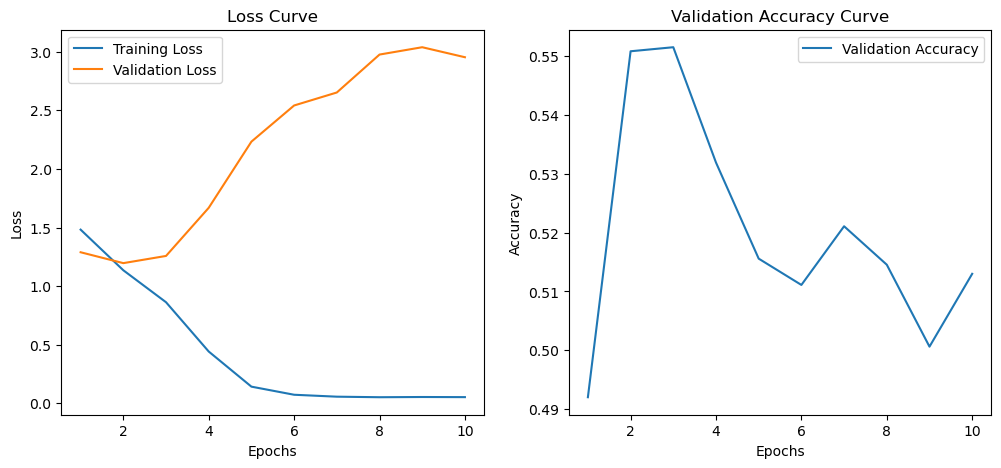

In [2]:
# Plotting Loss and Accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy Curve')
plt.show()


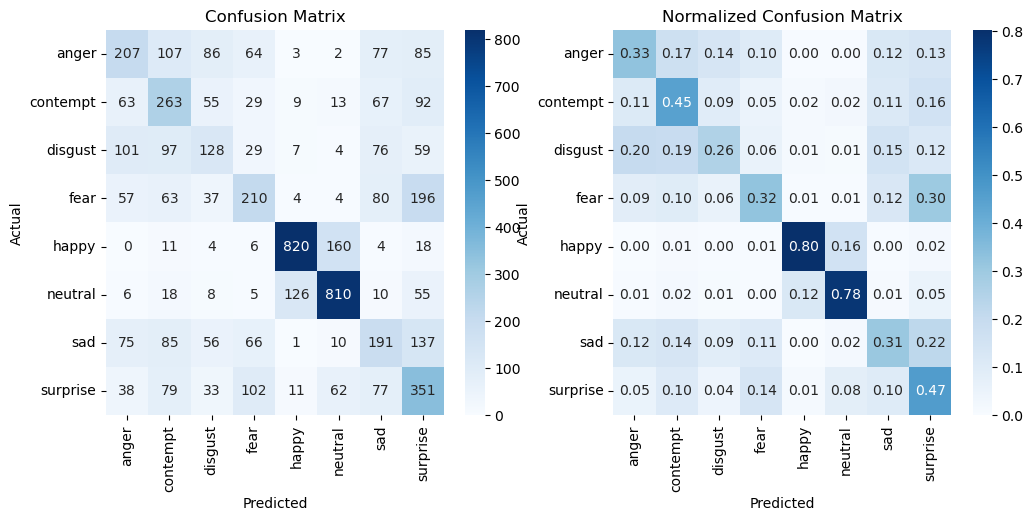

In [4]:
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm,cmap='Blues', fmt='d',annot=True, xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#cmd_normalized = ConfusionMatrixDisplay(cm_normalized, display_labels=dataset.classes)

# Plot Normalized Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized,cmap='Blues', fmt='.2f',annot=True, xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
